In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/description.pdf
/kaggle/input/diabetes/diabetic_data.csv


# Imposting Necssary Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default='kaggle'
from plotly import tools
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from IPython.display import display

# Attributes Description :
# Data Set Description


**VARIABLE NAMES**: DESCRIPTION

* **Encounter ID**	Unique identifier of an encounter
* **Patient number**	Unique identifier of a patient
* **Race**	Values: Caucasian, Asian, African American, Hispanic, and other
* **Gender**	Values: male, female, and unknown/invalid
* **Age**	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**	Weight in pounds
* **Admission type**	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**	Integer number of days between admission and discharge
* **Payer code**	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**	Number of lab tests performed during the encounter
* **Number of procedures** Numeric	Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**	Number of distinct generic names administered during the encounter
* **Number of outpatient visits** Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**	Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**	Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses**	Number of diagnoses entered to the system 0%
* **Glucose serum test result**	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result**	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications**	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications**	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications	For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted**	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission










In [3]:
df=pd.read_csv('/kaggle/input/diabetes/diabetic_data.csv')

In [4]:
def SevenSigma(df):
    """
    Print basic information and statistics of the dataset for better understanding.

    Parameters:
    - df (pd.DataFrame): The input dataset.

    Returns:
    None
    """
    # Display the shape of the dataset
    print(f"Shape of the dataset: {df.shape}")
    print("\n")

    # Display a sample of the dataset
    print("Sample from Dataset:")
    display(df.sample(5).style.background_gradient(cmap='Blues'))
    print("\n")

    # Display general information about the dataset
    print("Information of Dataset:")
    display(df.info())
    print("\n")

    # Display descriptive statistics for numeric features
    print("Description of Dataset for Numeric Features:")
    display(df.describe().T.style.background_gradient(cmap='Blues'))
    print("\n")

    # Display descriptive statistics for categorical features
    print("Description of Dataset for Categorical Features:")
    display(df.describe(exclude=np.number).T.style.background_gradient(cmap='Blues'))
    print("\n")

    # Display correlation heatmap for numeric features
    print("Correlation Heatmap:")
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn', linewidths=0.2)
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    plt.show()
    print("\n")

    # Display percentage of null values in the dataset
    print("Null Values in Dataset:")
    display(df.isnull().mean() * 100)
    print("\n")

    # Display duplicate rows in the dataset
    print("Duplicate Rows in Dataset:")
    display(df[df.duplicated()].style.background_gradient(cmap='Blues'))

In [5]:
#SevenSigma(df)

# Let's Handle Missing Values

In [6]:
df.sample(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
625,4959690,2526498,AfricanAmerican,Male,[30-40),?,6,25,7,3,?,Family/GeneralPractice,65,0,11,0,0,0,250.02,276,425,6,NaN,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
63711,177321366,24295527,AfricanAmerican,Female,[50-60),?,2,1,1,7,CP,InternalMedicine,44,0,24,0,1,0,428,584,250.42,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
52806,155751300,88704864,Caucasian,Female,[80-90),?,3,1,1,6,MC,Family/GeneralPractice,38,2,32,0,1,4,403,998,428,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
99688,416135552,181799528,Caucasian,Male,[70-80),?,3,1,1,8,MC,?,42,0,15,0,0,1,V57,V45,427,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
37594,116651010,23263218,AfricanAmerican,Male,[60-70),?,1,6,7,10,BC,Family/GeneralPractice,44,1,26,1,4,6,428,425,427,9,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
#max_glu_serum ,weight and A1Cresult has more than 85% null values so reoving it.
# examide and citoglipton has only one value so also removing it.
df.drop(columns=['max_glu_serum','A1Cresult','weight','citoglipton','examide','payer_code','medical_specialty'],inplace=True)

In [8]:
df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [9]:
df['race']=df['race'].apply(lambda x : 'Other' if x=='?' else x)

In [10]:
df.drop(index=[30506, 75551, 82573],inplace=True)

In [11]:
def replace_age_ranges(feature):
  age_ranges = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)','[60-70)', '[70-80)', '[80-90)', '[90-100)']
  values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  
  for i, age_range in enumerate(age_ranges):
    feature = feature.replace(age_range, values[i])

  return feature


In [12]:
df['age']=replace_age_ranges(df['age'])

In [13]:
df['admission_type_id']=df['admission_type_id'].apply(lambda x : 5 if x in (6,8) else x)
df['admission_type_id']=df['admission_type_id'].apply(lambda x : 1 if x == 4 else 2 if x==7 else x )

In [14]:
#Discharged Home: 1, 6, 8
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 1 if x in (6,8) else x)

#Uncategorized/Unknown: 18, 25, 26, 12
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 18 if x in (25,26,12) else x)

#Expired:11, 19, 20, 21
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 11 if x in (19,20,21) else x)

#Hospice:13, 14
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 13 if x ==14 else x)

# Discharged/Transferred to Hospital: 2, 9, 10, 23, 27, 28, 29
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 2 if x in ( 9, 10, 23, 27, 28, 29) else x)

#Discharged/Transferred to Care Facility: 3, 4, 5, 15, 24
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 3 if x in ( 4, 5, 15, 24) else x)

#Discharged to Outpatient Services:16, 17
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 16 if x ==17 else x)


In [15]:
# Unknown/Invalid: 9, 15, 17, 20, 21
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 9 if x in (15, 17, 20, 21) else x)

# Physician/Clinic Referral:1, 2, 3
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 1 if x in (2,3) else x)

#Transfer from Hospital: 4, 10, 22
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 4 if x in (10,22) else x)


#Transfer from Facility:5, 6, 18, 19, 25, 26
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 5 if x in (6, 18, 19, 25, 26) else x)

#Delivery:11, 12, 13, 14
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 11 if x in (12, 13, 14) else x)


In [16]:
index=[]
index=list(df[df['diag_1']=='?'].index)
index.extend(df[df['diag_2']=='?'].index)
index.extend(df[df['diag_3']=='?'].index)

In [17]:
df.drop(index=index,inplace=True)

In [18]:
diag1_list=[]
diag2_list=[]
diag3_list=[]

In [19]:
def diag_cluster(col,diag_list):
    for x in df[col]:

      if 'V' in x or 'E' in x: 

        diag_list.append(18)
        continue

      elif 1<=float(x)<=139:

        diag_list.append(1)

      elif 140<=float(x)<=239:

        diag_list.append(2)

      elif 240<=float(x)<=279:

        diag_list.append(3)

      elif 280<=float(x)<=289:

        diag_list.append(4)

      elif 290<=float(x)<=319:

        diag_list.append(5)

      elif 320<=float(x)<=389:

        diag_list.append(6)

      elif 390<=float(x)<=459:

        diag_list.append(7)

      elif 460<=float(x)<=519:

        diag_list.append(8)

      elif 520<=float(x)<=579:

        diag_list.append(9)

      elif 580<=float(x)<=629:

        diag_list.append(10)

      elif 630<=float(x)<=679:

        diag_list.append(11)

      elif 680<=float(x)<=709:

        diag_list.append(12)

      elif 710<=float(x)<=739:

        diag_list.append(13)

      elif 740<=float(x)<=759:

        diag_list.append(14)

      elif 760<=float(x)<=779:

        diag_list.append(15)

      elif 780<=float(x)<=799:

        diag_list.append(16)

      elif 800<=float(x)<=999:

        diag_list.append(17)

In [20]:
diag_cluster('diag_1',diag1_list)
diag_cluster('diag_2',diag2_list)
diag_cluster('diag_3',diag3_list)

In [21]:
df['diag_1']=diag1_list
df['diag_2']=diag2_list
df['diag_3']=diag3_list

In [22]:
medicines=['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']

for col in medicines:
    df[col]=df[col].apply(lambda x : 0 if x=='No' else 1)

In [23]:
df['change']=df['change'].apply(lambda x: 'Yes' if x=='Ch' else x)

In [24]:
df['gender']=df['change'].apply(lambda x: 0 if x=='Female' else 1)

In [25]:
df['change']=df['change'].apply(lambda x : 0 if x=='No' else 1)
df['diabetesMed']=df['diabetesMed'].apply(lambda x : 0 if x=='No' else 1)

In [26]:
df['readmitted']=df['readmitted'].apply(lambda x : 1 if x=='<30' else 0)

In [27]:
df.drop(index=df[df['discharge_disposition_id']==11].index,inplace=True)

In [28]:
df.head(10) 

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,1,2,1,1,7,3,59,0,18,0,0,0,3,3,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
2,64410,86047875,AfricanAmerican,1,3,1,1,7,2,11,5,13,2,0,1,11,3,18,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,500364,82442376,Caucasian,1,4,1,1,7,2,44,1,16,0,0,0,1,3,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
4,16680,42519267,Caucasian,1,5,1,1,7,1,51,0,8,0,0,0,2,2,3,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
5,35754,82637451,Caucasian,1,6,2,1,1,3,31,6,16,0,0,0,7,7,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6,55842,84259809,Caucasian,1,7,3,1,1,4,70,1,21,0,0,0,7,7,18,7,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
7,63768,114882984,Caucasian,1,8,1,1,7,5,73,0,12,0,0,0,7,8,3,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,12522,48330783,Caucasian,1,9,2,1,4,13,68,2,28,0,0,0,7,7,1,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
9,15738,63555939,Caucasian,1,10,3,3,4,12,33,3,18,0,0,0,7,2,8,8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
10,28236,89869032,AfricanAmerican,1,5,1,1,7,9,47,2,17,0,0,0,3,7,17,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [29]:
df.drop_duplicates(subset='patient_nbr',keep='first',inplace=True)

In [30]:
df.drop(columns=['encounter_id','patient_nbr'],inplace=True)

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['race']=encoder.fit_transform(df['race'])

In [53]:
'''X=df.drop(columns='readmitted')
y=df['readmitted']'''

In [33]:
X=df[['num_lab_procedures', 'num_medications', 'diag_3', 'diag_1', 'age',
       'diag_2', 'time_in_hospital', 'number_diagnoses', 'num_procedures',
       'admission_source_id', 'race', 'admission_type_id',
       'discharge_disposition_id', 'insulin', 'diabetesMed', 'change',
       'metformin', 'glipizide', 'number_outpatient', 'glyburide',
       'rosiglitazone', 'pioglitazone', 'number_inpatient', 'glimepiride',
       'number_emergency']]
y=df['readmitted']

In [45]:
X,y=X_res, y_res

In [79]:
6253/63080*100

9.91280913126189

In [78]:
y.value_counts()

readmitted
0    63080
1     6253
Name: count, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)


In [38]:
Counter(y_train)

Counter({1: 47324, 0: 47296})

In [125]:
from sklearn.metrics import f1_score
import optuna
from optuna.samplers import TPESampler
import catboost
def objective(trial):
    model = catboost.CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        boosting_type= trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        bootstrap_type=trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "MVS"]
        ),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        #bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        #max_leaves=trial.suggest_int("max_leaves",15,40),
        min_data_in_leaf=trial.suggest_int("min_data_in_leaf",51,120),
        loss_function='Logloss',
        eval_metric='Logloss',
        task_type='GPU',
        verbose=False,
    )
    model.fit(X_train, y_train,eval_set=[(X_test,y_test)])
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred,average='micro')

In [126]:
%%time

optuna.logging.set_verbosity(optuna.logging.WARNING)


sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=31)

CPU times: user 16min 15s, sys: 45.4 s, total: 17min 1s
Wall time: 15min 27s


In [127]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  31
Best trial:
  Value:  0.9092534902503749
  Params: 
    iterations: 475
    learning_rate: 0.027583475549166746
    depth: 4
    boosting_type: Ordered
    bootstrap_type: MVS
    l2_leaf_reg: 2.855007611568483e-05
    random_strength: 3.72312200494449e-05
    bagging_temperature: 5.3881673400335695
    od_type: Iter
    od_wait: 18
    min_data_in_leaf: 112


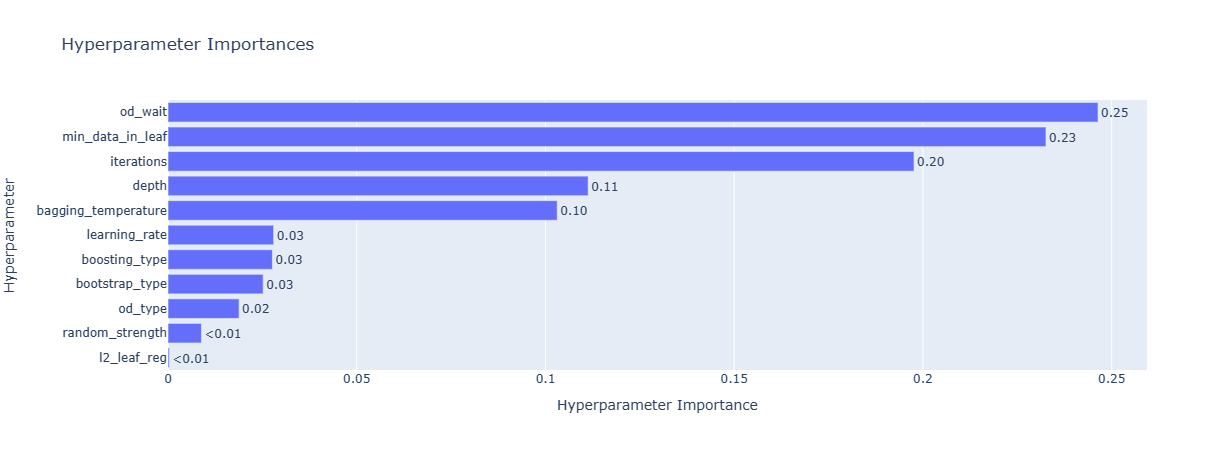

In [128]:
fig = optuna.visualization.plot_param_importances(study)
fig.show()

In [129]:
study.best_trial

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9092534902503749], datetime_start=datetime.datetime(2024, 1, 18, 12, 45, 39, 203074), datetime_complete=datetime.datetime(2024, 1, 18, 12, 45, 46, 402370), params={'iterations': 475, 'learning_rate': 0.027583475549166746, 'depth': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS', 'l2_leaf_reg': 2.855007611568483e-05, 'random_strength': 3.72312200494449e-05, 'bagging_temperature': 5.3881673400335695, 'od_type': 'Iter', 'od_wait': 18, 'min_data_in_leaf': 112}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': IntDistribution(high=1000, log=False, low=100, step=1), 'learning_rate': FloatDistribution(high=0.1, log=True, low=0.001, step=None), 'depth': IntDistribution(high=10, log=False, low=4, step=1), 'boosting_type': CategoricalDistribution(choices=('Ordered', 'Plain')), 'bootstrap_type': CategoricalDistribution(choices=('Bayesian', 'MVS')), 'l2_leaf_reg': FloatDistribution(high=100.0, log

In [ ]:
df['readmitted'].value_counts()

In [34]:
%%time
from collections import Counter  

from imblearn.over_sampling import SMOTE

sm=SMOTE(sampling_strategy='minority',random_state=42,n_jobs=-1)

X_res, y_res = sm.fit_resample(X, y)

CPU times: user 1.19 s, sys: 534 ms, total: 1.73 s
Wall time: 1.39 s


In [75]:
#over and under sampled
ov_X=X_resampled
ov_y=y_resampled

In [109]:
#params={'iterations': 513, 'learning_rate': 0.0397842000536864, 'depth': 7, 'l2_leaf_reg': 0.05206518524157017, 'bootstrap_type': 'Bayesian', 'random_strength': 4.6530700573768906e-07, 'bagging_temperature': 0.1394386439385641, 'od_type': 'IncToDec', 'od_wait': 30}
#params={'iterations': 810, 'learning_rate': 0.02656293600669053, 'depth': 5, 'l2_leaf_reg': 0.28259770270974677, 'bootstrap_type': 'Bayesian', 'random_strength': 3.002070542128706e-05, 'bagging_temperature': 0.7065794059168207, 'od_type': 'IncToDec', 'od_wait': 28}
#params={'iterations': 471, 'learning_rate': 0.0766629782215195, 'depth': 8, 'l2_leaf_reg': 0.0009941919255431284, 'bootstrap_type': 'Bayesian', 'random_strength': 1.0067486415831434e-08, 'bagging_temperature': 0.4183095348176672, 'od_type': 'Iter', 'od_wait': 45}
#params={'iterations': 226, 'learning_rate': 0.002490020818620744, 'depth': 9, 'l2_leaf_reg': 48.15215820395775, 'bootstrap_type': 'Bayesian', 'random_strength': 6.6193844201488494e-06, 'bagging_temperature': 6.923226156693141, 'od_type': 'Iter', 'od_wait': 13}
# over sampled full features
#params={'iterations': 899, 'learning_rate': 0.06966733523156289, 'depth': 9, 'l2_leaf_reg': 8.071917904799597e-08, 'bootstrap_type': 'Bayesian', 'random_strength': 0.001980689035613274, 'bagging_temperature': 5.000998021136371, 'od_type': 'IncToDec', 'od_wait': 17}
# over sampled 
# params={'iterations': 881, 'learning_rate': 0.01961057467284439, 'depth': 10, 'l2_leaf_reg': 0.0026174150623770134, 'bootstrap_type': 'Bayesian', 'random_strength': 2.191236365450965e-06, 'bagging_temperature': 5.6475486877966965, 'od_type': 'IncToDec', 'od_wait': 42}

#params={'iterations': 813, 'learning_rate': 0.09425433483853037, 'depth': 10, 'l2_leaf_reg': 0.00025117779012403147, 'bootstrap_type': 'Bayesian', 'random_strength': 5.2681683837260795, 'bagging_temperature': 9.466232535470276, 'od_type': 'Iter', 'od_wait': 22, 'min_data_in_leaf': 83}

#params={'iterations': 203, 'learning_rate': 0.0792462129989754, 'depth': 7, 'l2_leaf_reg': 0.006079895907372734, 'bootstrap_type': 'Bayesian', 'random_strength': 4.712281485061178e-05, 'bagging_temperature': 2.3702698024302773, 'od_type': 'IncToDec', 'od_wait': 10, 'min_data_in_leaf': 94}

params={'iterations': 505, 'learning_rate': 0.02782150749600363, 'depth': 4, 'l2_leaf_reg': 0.134465926211342, 'bootstrap_type': 'Bayesian', 'random_strength': 1.0352167279068568e-07, 'bagging_temperature': 1.043841134968342, 'od_type': 'Iter', 'od_wait': 29, 'min_data_in_leaf': 88}




In [130]:
params={'iterations': 475, 'learning_rate': 0.027583475549166746, 'depth': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS', 'l2_leaf_reg': 2.855007611568483e-05, 'random_strength': 3.72312200494449e-05, 'bagging_temperature': 5.3881673400335695, 'od_type': 'Iter', 'od_wait': 18, 'min_data_in_leaf': 112}

In [131]:
model=catboost.CatBoostClassifier(**params,verbose=False)

In [132]:
model.fit(X_train,y_train)

In [47]:
probs=model.predict_proba(X_test)

In [133]:
y_pred=model.predict(X_test)

In [134]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     15760
           1       0.38      0.00      0.00      1574

    accuracy                           0.91     17334
   macro avg       0.64      0.50      0.48     17334
weighted avg       0.86      0.91      0.87     17334



In [73]:
"""
Optuna example that demonstrates a pruner for CatBoost.

In this example, we optimize the validation accuracy of cancer detection using CatBoost.
We optimize both the choice of booster models and their hyperparameters. Throughout
training of models, a pruner observes intermediate results and stop unpromising trials.

You can run this example as follows:
    $ python catboost_pruning.py

"""

import numpy as np
import optuna
from optuna.integration import CatBoostPruningCallback

import catboost as cb
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


def objective(trial: optuna.Trial) -> float:
    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "eval_metric": "F1",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    gbm = cb.CatBoostClassifier(**param,verbose=False)

    pruning_callback = CatBoostPruningCallback(trial, "F1")
    gbm.fit(
        train_x,
        train_y,
        eval_set=[(valid_x, valid_y)],
        verbose=0,
        early_stopping_rounds=100,
        callbacks=[pruning_callback],
    )

    # evoke pruning manually.
    pruning_callback.check_pruned()

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    f1 = f1_score(valid_y, pred_labels)

    return f1

In [74]:
train_x, valid_x, train_y, valid_y=train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [75]:
study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize"
    )
study.optimize(objective, n_trials=50)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-01-18 12:13:00,114] A new study created in memory with name: no-name-89d85033-3709-4953-ac76-e8177ec742d9
[I 2024-01-18 12:13:08,703] Trial 0 finished with value: 0.750825666430762 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.012485155683959045, 'depth': 6, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 1.7980758597889568}. Best is trial 0 with value: 0.750825666430762.
[I 2024-01-18 12:13:23,795] Trial 1 finished with value: 0.801818531087917 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08666065853742135, 'depth': 7, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 1 with value: 0.801818531087917.
[I 2024-01-18 12:13:52,809] Trial 2 finished with value: 0.7913389587645279 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.04958426241678864, 'depth': 5, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.10294819949633971}. Best is trial 1 with value: 0

Number of finished trials: 50
Best trial:
  Value: 0.8874138371202451
  Params: 
    objective: Logloss
    colsample_bylevel: 0.09850379919852927
    depth: 11
    boosting_type: Plain
    bootstrap_type: MVS


In [76]:
trial.params

{'objective': 'Logloss',
 'colsample_bylevel': 0.09850379919852927,
 'depth': 11,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS'}